In [2]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("csse_covid_19_time_series/time_series_covid19_deaths_us.csv")
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,1,1,1,1,2,3,3,4,4,4
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,0,0,0,1,1,1,1,1
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,3,3,3,6,8,11,12,15,18,20
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,0,0,0,0,0,0,0,0,0,1


The data needs to be transformed for it to be useful. 

In [31]:
# Transform the data using padas melt
df_melt = pd.melt(df, id_vars=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat','Long_', 'Combined_Key', 'Population'], var_name="date", value_name='numdeaths')
df_melt = df_melt[['Province_State', 'Country_Region','date', 'numdeaths']]
df_melt.tail(10)

,Province_State,Country_Region,date,numdeaths
243965,Tennessee,US,4/5/20,0
243966,Texas,US,4/5/20,0
243967,Utah,US,4/5/20,0
243968,Vermont,US,4/5/20,17
243969,Virginia,US,4/5/20,36
243970,Washington,US,4/5/20,0
243971,West Virginia,US,4/5/20,0
243972,Wisconsin,US,4/5/20,0
243973,Wyoming,US,4/5/20,0
243974,Grand Princess,US,4/5/20,3


In [38]:
df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population',
       '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20'

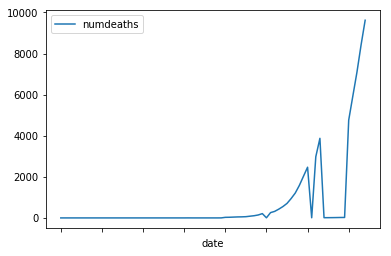

In [40]:
df_melt.sort_values(by='date', inplace=True)
df_melt.groupby('date').sum().plot();

In [39]:
# Export transformed data as CSV
df_melt.to_csv("transformed-data/transformed-us-covid19-deaths.csv", index=False)